# Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1:
- Read the boston house dataset

- Create train and test datasets. 

In [3]:
import pandas as pd
df = pd.read_csv('boston_house_prices.csv')

In [6]:
df.shape

(506, 14)

In [7]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step 2:
Create a scatter plot of each attribute with the mean house price.

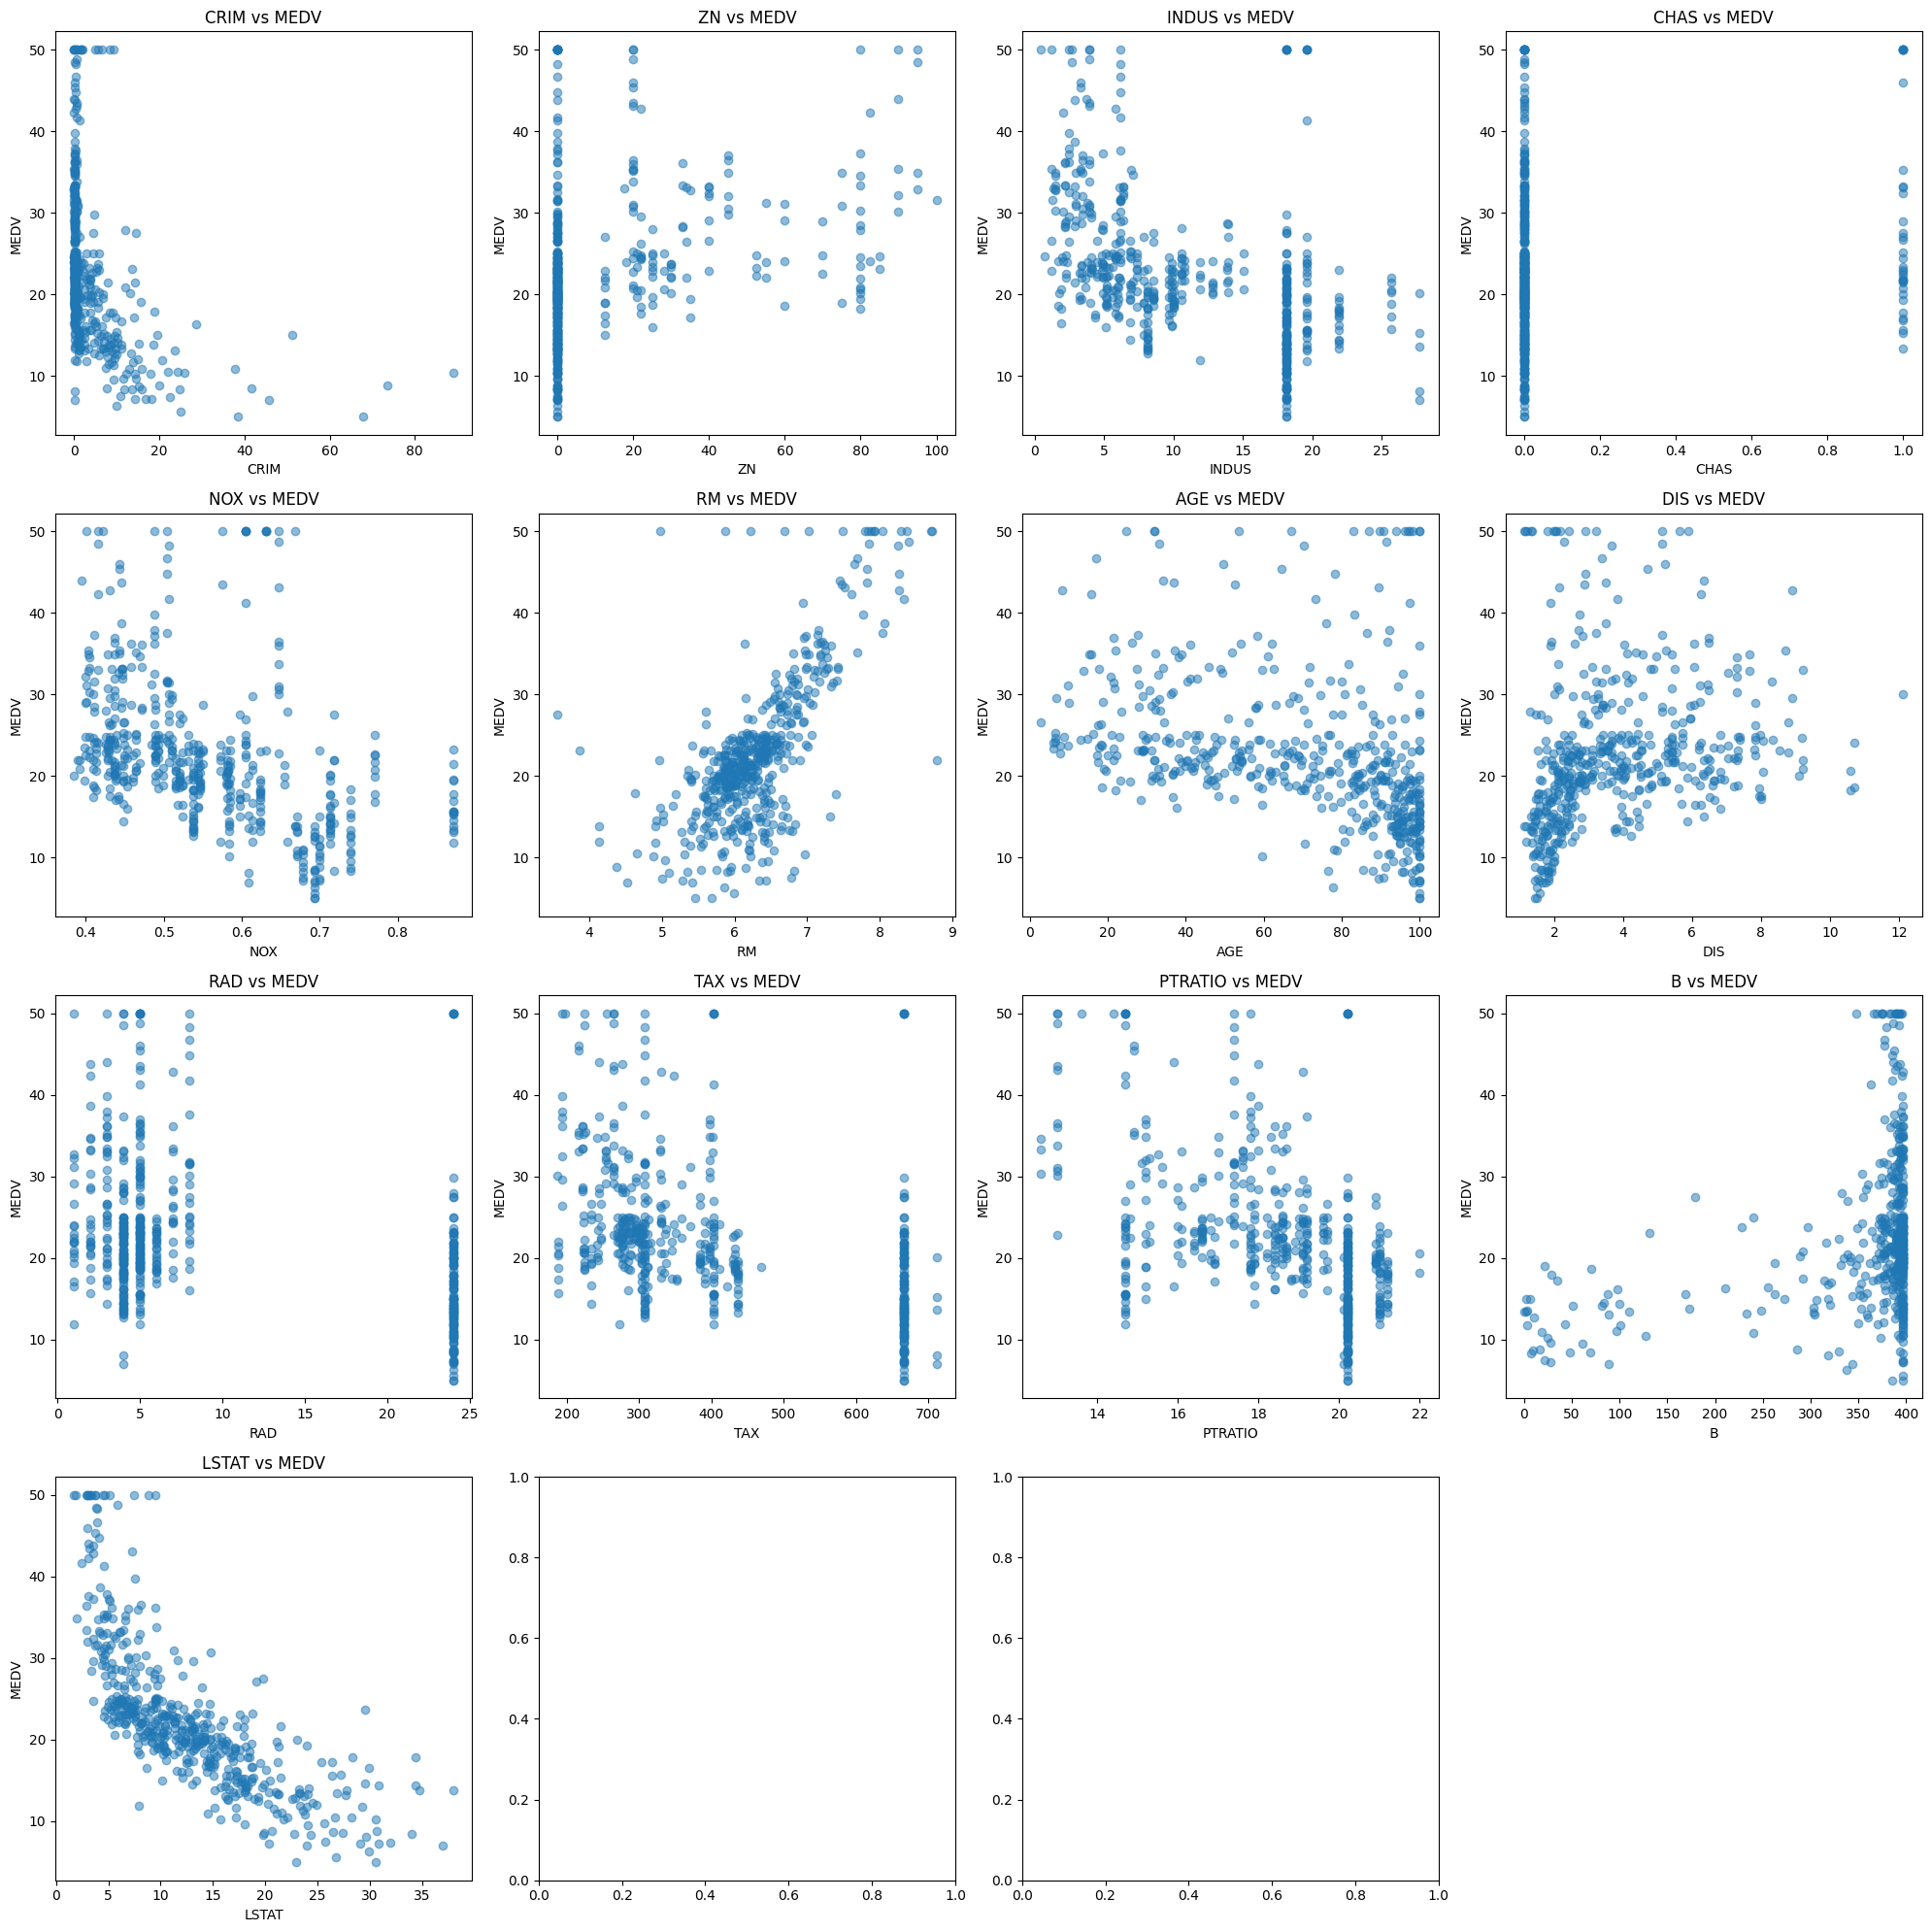

In [10]:
figure, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel() # convert to 1D array

# Create scatter plots for each feature
for index, col in enumerate(X.columns):
    axes[index].scatter(X[col], y, alpha=0.5)
    axes[index].set_xlabel(col)
    axes[index].set_ylabel("MEDV")
    axes[index].set_title(f"{col} vs MEDV")

# Remove the empty subplot and adjust layout
axes[-1].remove()
plt.tight_layout()

### Step 3:
Create a box plot of all attributes.

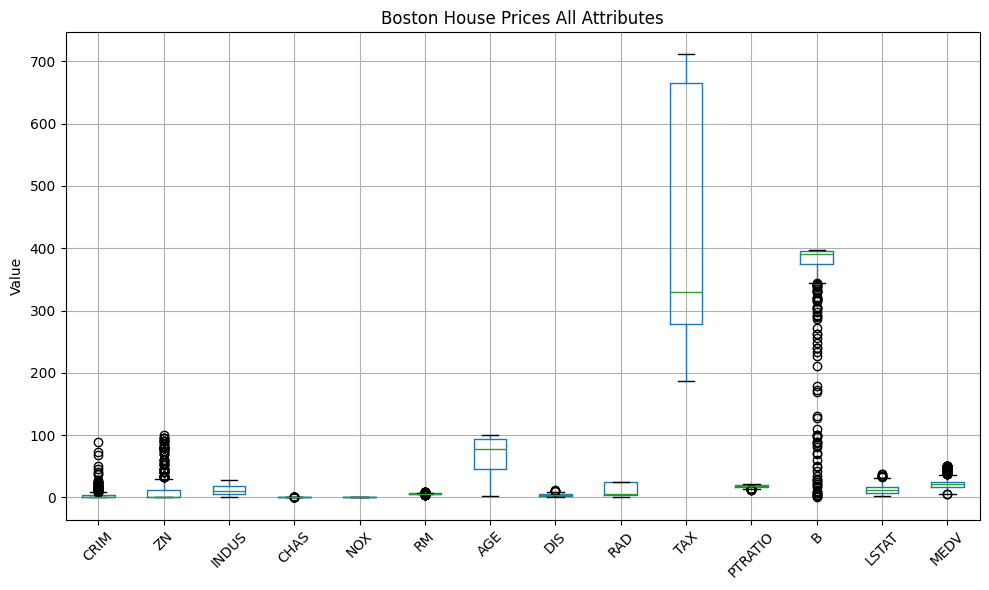

In [23]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Boston House Prices All Attributes')
plt.ylabel('Value')
plt.tight_layout()

### Step 4:
Use `StandardScaler()` to scale the trainin data set.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
# fit KNR model on non scaled data
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
# score KNR model on non scaled data
score_nonscaled = knr.score(X_test, y_test)

In [32]:
# fit KNR model on scaled data
knr_scaled = KNeighborsRegressor()
knr_scaled.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
# score KNR model on scaled data
score_scaled = knr_scaled.score(X_test_scaled, y_test)

In [35]:
print("non scaled score:", score_nonscaled)
print("scaled score:", score_scaled)

non scaled score: 0.36454787656595133
scaled score: 0.5614707422546583


### Step 6:
Repeat Step 5 for `RandomForestRegressor`. Use

`RandomForestRegressor(n_estimators=100, random_state=0)`

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
# fit RFR model on non scaled data
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, y_train)
# score RFR model on non scaled data
score_nonscaled = rfr.score(X_test, y_test)

In [48]:
# fit RFR model on scaled data
rfr_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
rfr_scaled.fit(X_train, y_train)
X_test_scaled = scaler.transform(X_test)
# score RFR model on scaled data
score_scaled = rfr_scaled.score(X_test, y_test)

In [50]:
print("non scaled score:", score_nonscaled)
print("scaled score:", score_scaled)

non scaled score: 0.7743668731072826
scaled score: 0.7743668731072826


In [51]:
# interesting observation
if score_nonscaled == score_scaled:
    print("The scores are the same")

The scores are the same
